In [1]:
import pandas as pd
import numpy as np

# 데이터 파일 경로
train1_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax1_TRAIN.tsv"
test1_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax1_TEST.tsv"
train2_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax2_TRAIN.tsv"
test2_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/NonInvasiveFetalECGThorax2_TEST.tsv"

# 데이터 로딩
train1 = pd.read_csv(train1_path, sep="\t", header=None)
test1 = pd.read_csv(test1_path, sep="\t", header=None)
train2 = pd.read_csv(train2_path, sep="\t", header=None)
test2 = pd.read_csv(test2_path, sep="\t", header=None)

In [2]:
print(sorted(train1[0].unique()))
print("train1 클래스 수:", len(train1[0].unique()))

print(sorted(test1[0].unique()))
print("test1 클래스 수:", len(test1[0].unique()))

print(sorted(train2[0].unique()))
print("train2 클래스 수:", len(train2[0].unique()))

print(sorted(test2[0].unique()))
print("test2 클래스 수:", len(test2[0].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train1 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test1 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train2 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test2 클래스 수: 42


In [3]:
# 학습용/테스트용 데이터 각각 결합
train_combined = pd.concat([train1, train2], ignore_index=True)
test_combined = pd.concat([test1, test2], ignore_index=True)

In [4]:
print(sorted(train_combined[0].unique()))
print("train_combined 클래스 수:", len(train_combined[0].unique()))

print(sorted(test_combined[0].unique()))
print("test_combined 클래스 수:", len(test_combined[0].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
train_combined 클래스 수: 42
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
test_combined 클래스 수: 42


In [8]:
def inject_mean_shift(df, start=500, delta=2.0):
    """
    시계열 x에 평균을 변화시키는 이상치 삽입
    start 시점부터 값을 delta만큼 증가시킴
    """
    labels = df.iloc[:, 0].copy()
    series = df.iloc[:, 1:].copy().values
    series[:, start:] += delta
    df_anom = pd.DataFrame(np.column_stack([labels, series]))
    return df_anom

In [9]:
# 이상치 포함 데이터 생성
train_anomalous = inject_mean_shift(train_combined)
test_anomalous = inject_mean_shift(test_combined)

In [10]:
print(sorted(train_anomalous[0].unique()))
print("train_anomalous 클래스 수:", len(train_anomalous[0].unique()))

print(sorted(test_anomalous[0].unique()))
print("test_anomalous 클래스 수:", len(test_anomalous[0].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0]
train_anomalous 클래스 수: 42
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0]
test_anomalous 클래스 수: 42


In [11]:
# 첫 번째 열: 클래스 라벨
# 나머지 열: 시계열 데이터
train_labels = train_anomalous.iloc[:, 0].values
train_series = train_anomalous.iloc[:, 1:].values

# 첫 번째 열: 클래스 라벨
# 나머지 열: 시계열 데이터
test_labels = test_anomalous.iloc[:, 0].values
test_series = test_anomalous.iloc[:, 1:].values

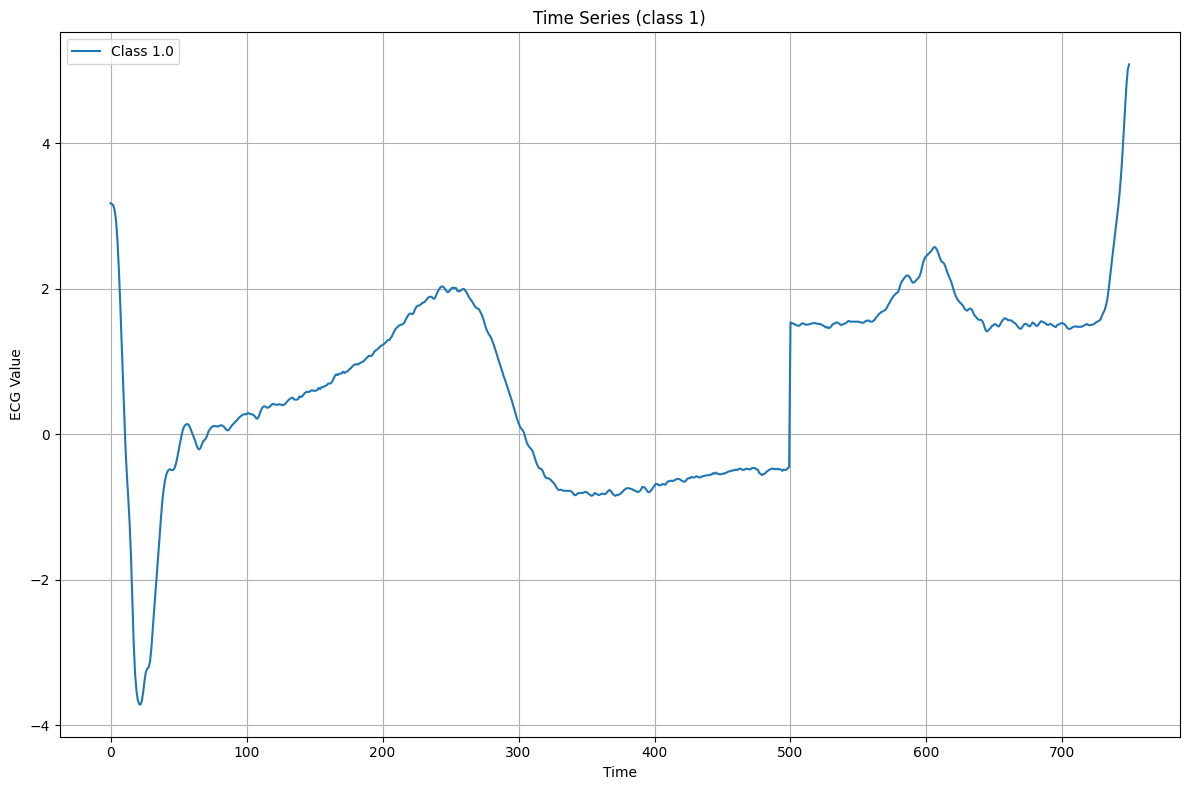

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
unique_labels = sorted(set(train_labels))[:1]

for i, label in enumerate(unique_labels):
    sample_idx = list(train_labels).index(label)
    plt.plot(train_series[sample_idx], label=f'Class {label}')

plt.title('Time Series (class 1)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


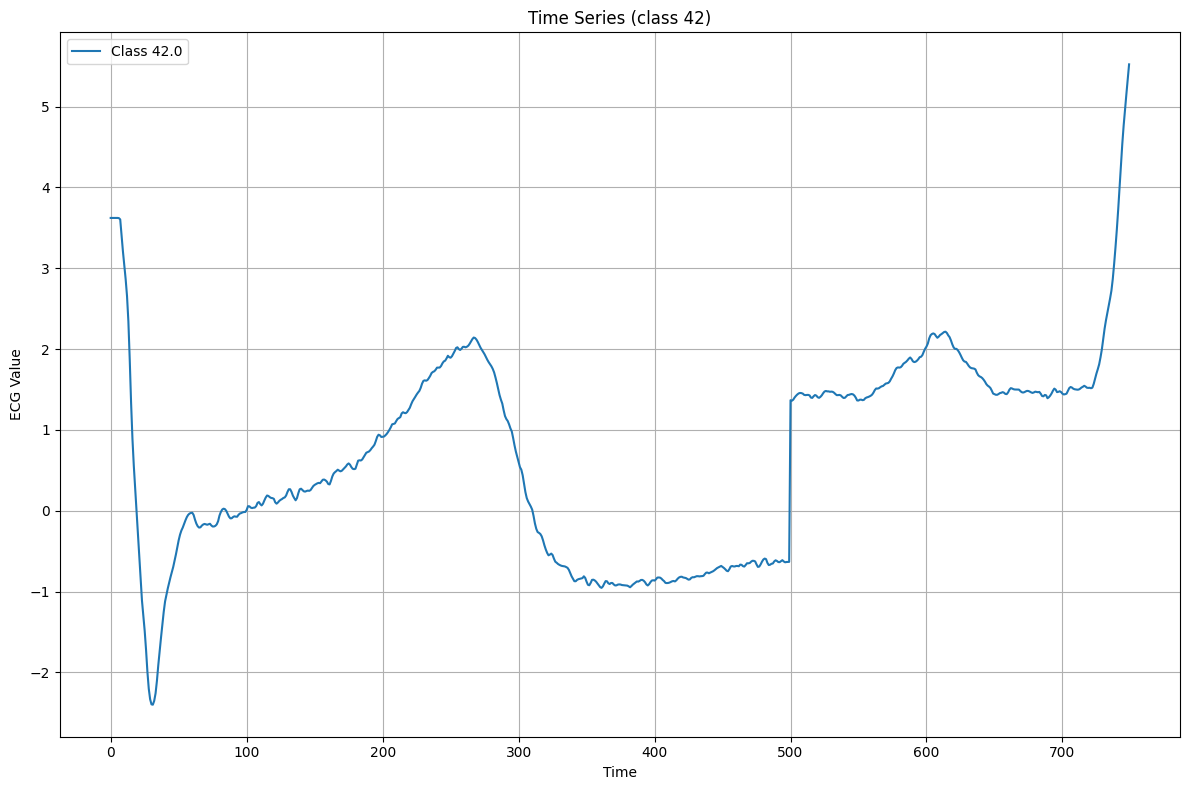

In [15]:
plt.figure(figsize=(12, 8))
unique_labels = sorted(set(train_labels))[41:]

for i, label in enumerate(unique_labels):
    sample_idx = list(train_labels).index(label)
    plt.plot(train_series[sample_idx], label=f'Class {label}')

plt.title('Time Series (class 42)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

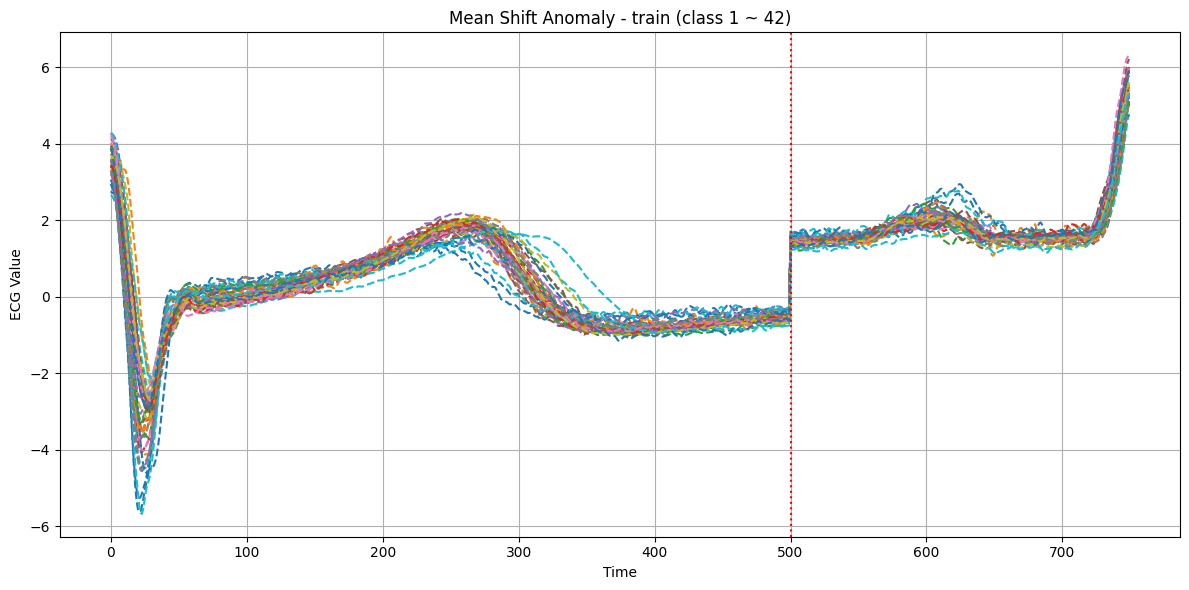

In [21]:
# 시각화
plt.figure(figsize=(12, 6))
for i in range(41):
    plt.plot(train_series[i], label=f'Class {train_labels[i]} Anomaly', linestyle='--')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.title('Mean Shift Anomaly - train (class 1 ~ 42)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

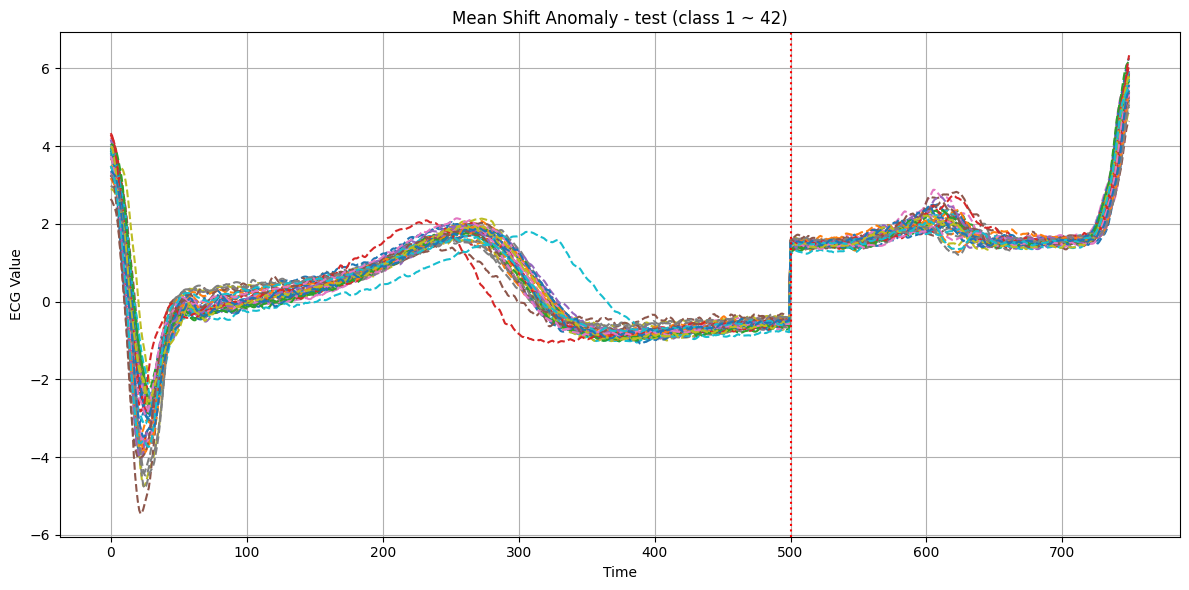

In [22]:
# 시각화
plt.figure(figsize=(12, 6))
for i in range(41):
    plt.plot(test_series[i], label=f'Class {test_labels[i]} Anomaly', linestyle='--')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.title('Mean Shift Anomaly - test (class 1 ~ 42)')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
train_save_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/ECG_Train_with_anomaly.csv"
test_save_path = "C:/Users/Pro/Desktop/AnomalyDiT-main/AnomalyDiT-main/Dataset/ECG_Test_with_anomaly.csv"

# CSV 저장
train_anomalous.to_csv(train_save_path, index=False, header=False)
test_anomalous.to_csv(test_save_path, index=False, header=False)

In [24]:
# CSV 불러오기
train_df = pd.read_csv(train_save_path, header=None)
test_df = pd.read_csv(test_save_path, header=None)

# 라벨 및 시계열 분리
train_labels = train_df.iloc[:, 0].values
train_series = train_df.iloc[:, 1:].values

test_labels = test_df.iloc[:, 0].values
test_series = test_df.iloc[:, 1:].values

In [28]:
# 고유 클래스 확인
unique_train_classes = sorted(np.unique(train_labels))
len(unique_train_classes)

42

In [29]:
unique_test_classes = sorted(np.unique(test_labels))
len(unique_test_classes)

42

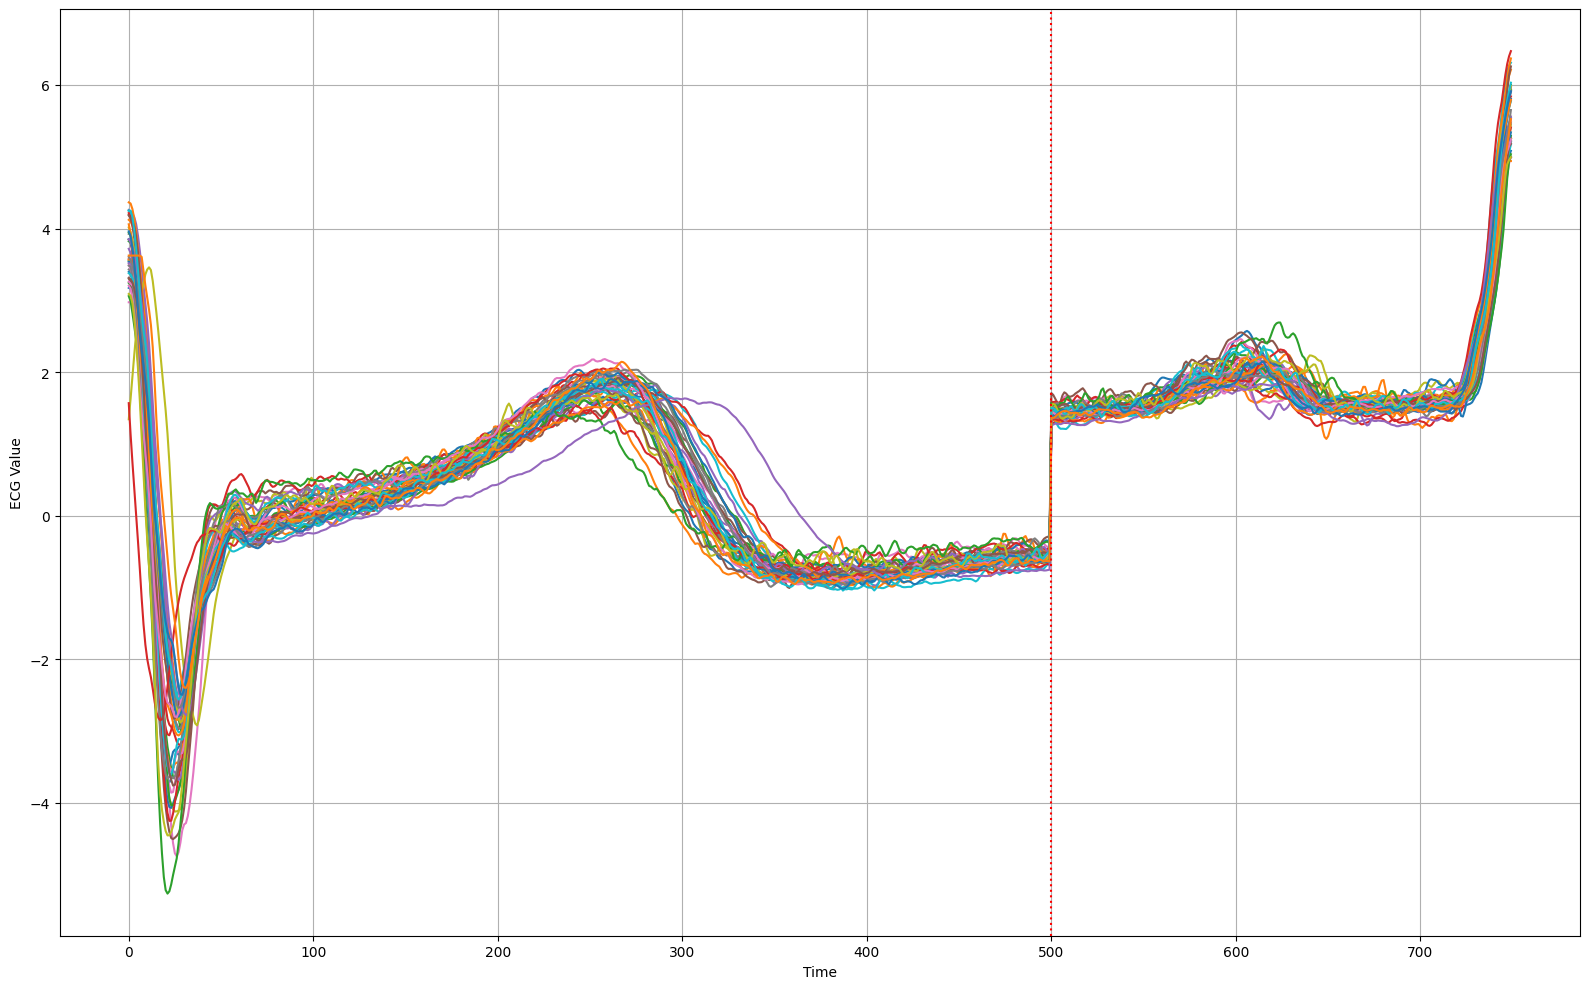

In [39]:
plt.figure(figsize=(16, 10))
for class_id in unique_train_classes:
    idx = np.where(train_labels == class_id)[0][0]
    plt.plot(train_series[idx], label=f'Class {int(class_id)}')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(ncol=6, fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

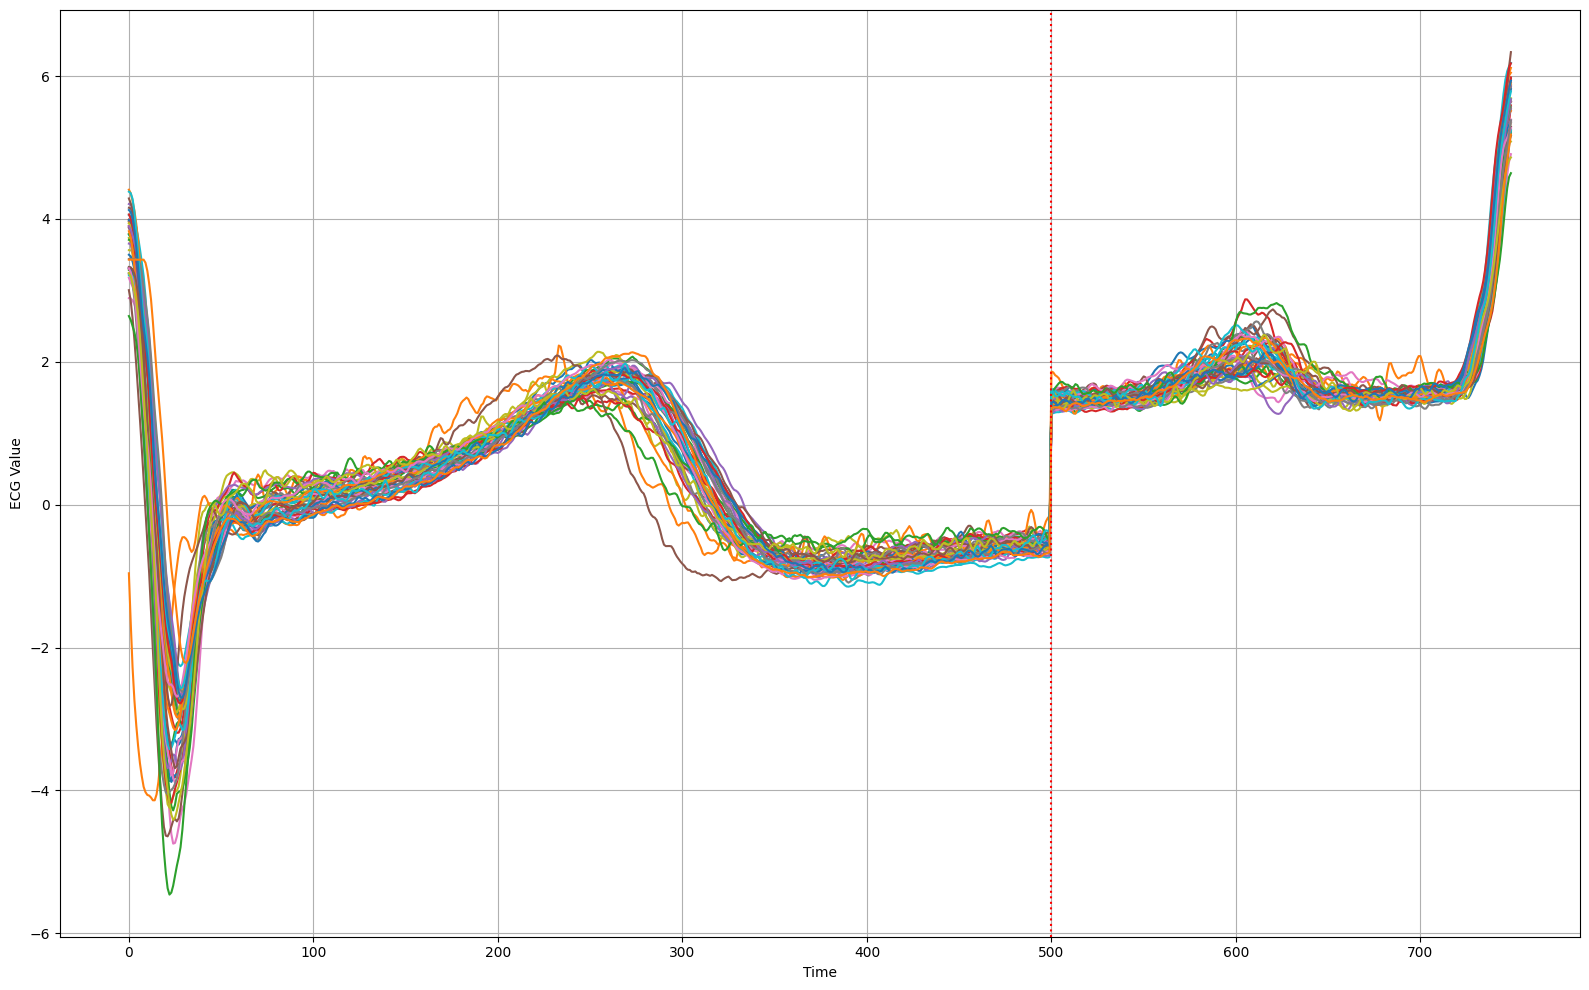

In [40]:
plt.figure(figsize=(16, 10))
for class_id in unique_test_classes:
    idx = np.where(test_labels == class_id)[0][0]
    plt.plot(test_series[idx], label=f'Class {int(class_id)}')

plt.axvline(500, color='red', linestyle=':', label='Anomaly Start')
plt.xlabel('Time')
plt.ylabel('ECG Value')
# plt.legend(ncol=6, fontsize='small', loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.grid(True)
plt.tight_layout()
plt.show()